In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic - ML from Disaster

This is an open Kaggle called [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic). This dataset is about predicting the survivors of the Titanic. We will either use 0 for did not survive or 1 for surviving the sinking ship. In this notebook, we'll explore the data (both test and train), followed by using several supervised models to find the best model for the data.

We will be attempting to use Supervised Machine Learning to predict whether someone survived (1) or not (0). This will be a binary classification problem. This rules out regression models like Simple Linear Regression and Multiple Linear Regression.

# Motivation

I chose this dataset because it is an open competition on Kaggle, and it is a great opportunity for me to learn and apply my new knowledge about supervised machine learning. I hope that the outcome of this project is that I will know better which supervised learning model to apply and how to explore and clean my data properly.

# Exploratory Data Analysis (EDA)

The data, as created by Cukierski (2012), has two parts: the test.csv and the train.csv. We will use the train.csv to train our model, from which we will create a test and training set. The test.csv is what we will validate against (submit to the competition) to check which model performs the best.

Now, let's understand the data we've been given. Let's explore and check how many features we have and how the data looks.

In [2]:
import pandas as pd

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

print("Training data")
print("Number of entries: ", df_train.size / df_train.columns.size)
print("Shape: ", df_train.shape)
print("Features: ", df_train.columns)

df_train.head()

Training data
Number of entries:  891.0
Shape:  (891, 12)
Features:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

print("Test data")
print("Number of entries: ", df_test.size / df_test.columns.size)
print("Shape: ", df_test.shape)
print("Features: ", df_test.columns)

df_test.head()

Test data
Number of entries:  418.0
Shape:  (418, 11)
Features:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


So, for our train dataset, we have 819 rows and 12 features. However, not all of these will be relevant. In the test dataset we have 418 rows and 11 features (without survived). 

Let's look more closely at how Pclass (Ticket class), sex, age, sibling and/or spouse, parent and/or children, and embarked are distributed. We'll also see if we have any null values and look to tidy up the data if possible.

Unique Classes:  3
Unique Classes in test:  3


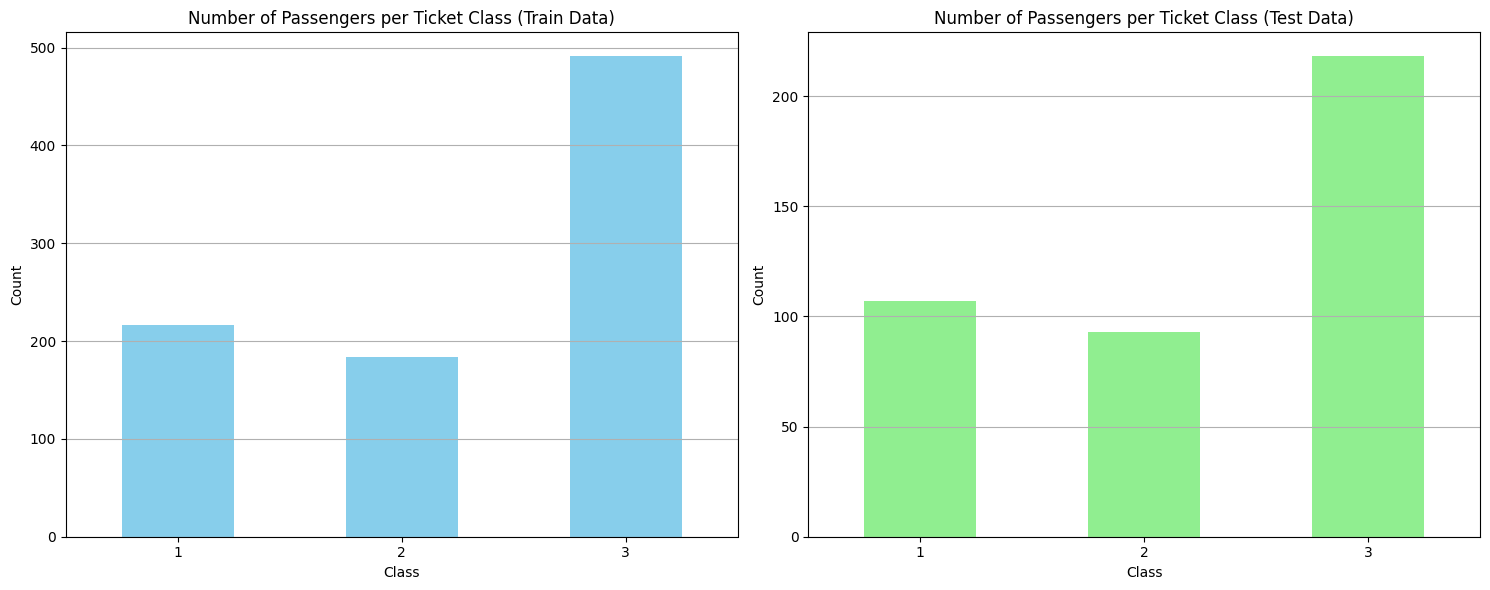

In [4]:
import matplotlib.pyplot as plt

print("Unique Classes: ", df_train['Pclass'].nunique())
print("Unique Classes in test: ", df_test['Pclass'].nunique())

class_counts_train = df_train['Pclass'].value_counts().sort_index()
class_counts_test = df_test['Pclass'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
class_counts_train.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Number of Passengers per Ticket Class (Train Data)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(class_counts_train)))
axes[0].set_xticklabels(class_counts_train.index, rotation=0)
axes[0].grid(axis='y')

# Plot for df_test
class_counts_test.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Number of Passengers per Ticket Class (Test Data)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(class_counts_test)))
axes[1].set_xticklabels(class_counts_test.index, rotation=0)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

We can clearly see that there are more people in the 3rd class of the tickets. However, the distribution is not completely lopsided, so it should be ok for most models.

Unique Survived:  2


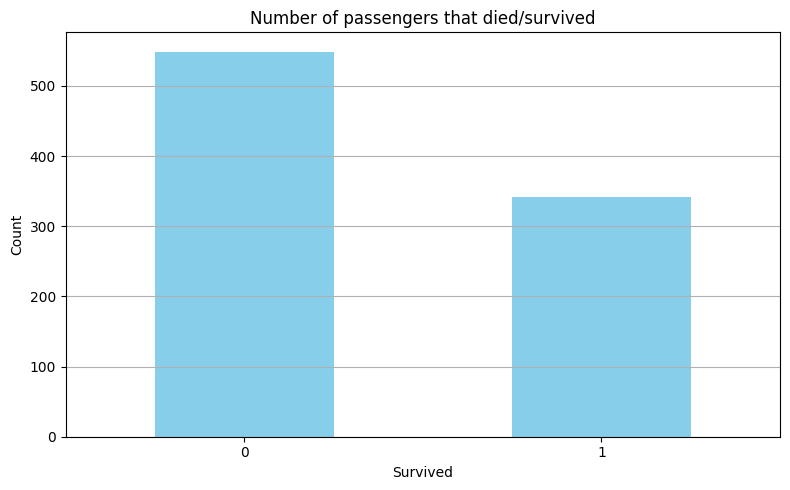

In [5]:
import matplotlib.pyplot as plt

print("Unique Survived: ", df_train['Survived'].nunique())

survived_counts = df_train['Survived'].value_counts().sort_index()
survived_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title("Number of passengers that died/survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

We can see we have a not-so-different survival rate. The distribution should be ok for most models.

Unique Sexes:  2
Unique Sexes in test:  2


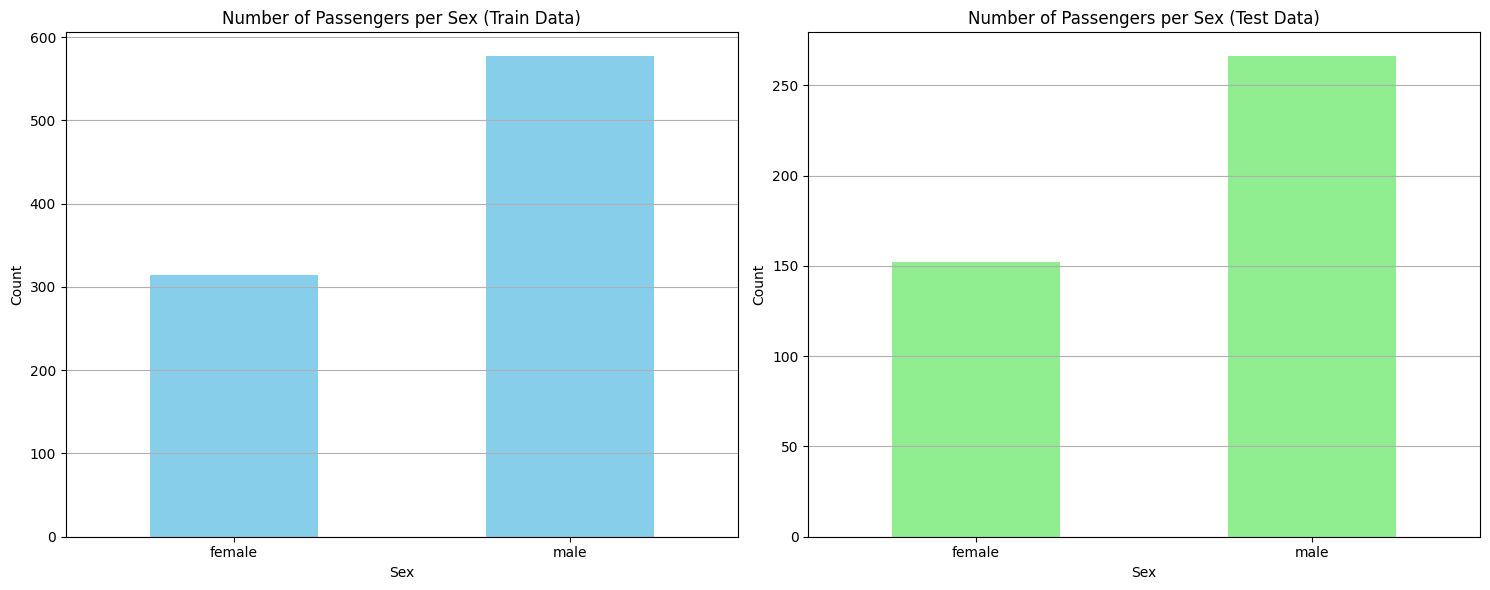

In [6]:
import matplotlib.pyplot as plt

print("Unique Sexes: ", df_train['Sex'].nunique())
print("Unique Sexes in test: ", df_test['Sex'].nunique())

sex_counts_train = df_train['Sex'].value_counts().sort_index()
sex_counts_test = df_test['Sex'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
sex_counts_train.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Number of Passengers per Sex (Train Data)")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(sex_counts_train)))
axes[0].set_xticklabels(sex_counts_train.index, rotation=0)
axes[0].grid(axis='y')

# Plot for df_test
sex_counts_test.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Number of Passengers per Sex (Test Data)")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(sex_counts_test)))
axes[1].set_xticklabels(sex_counts_test.index, rotation=0)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

Ok, so we only have male and female. There are almost twice as many males than females. Still, it's not completely lopsided so it should be ok for most models. It also seems to be similar for the test and the train datasets.

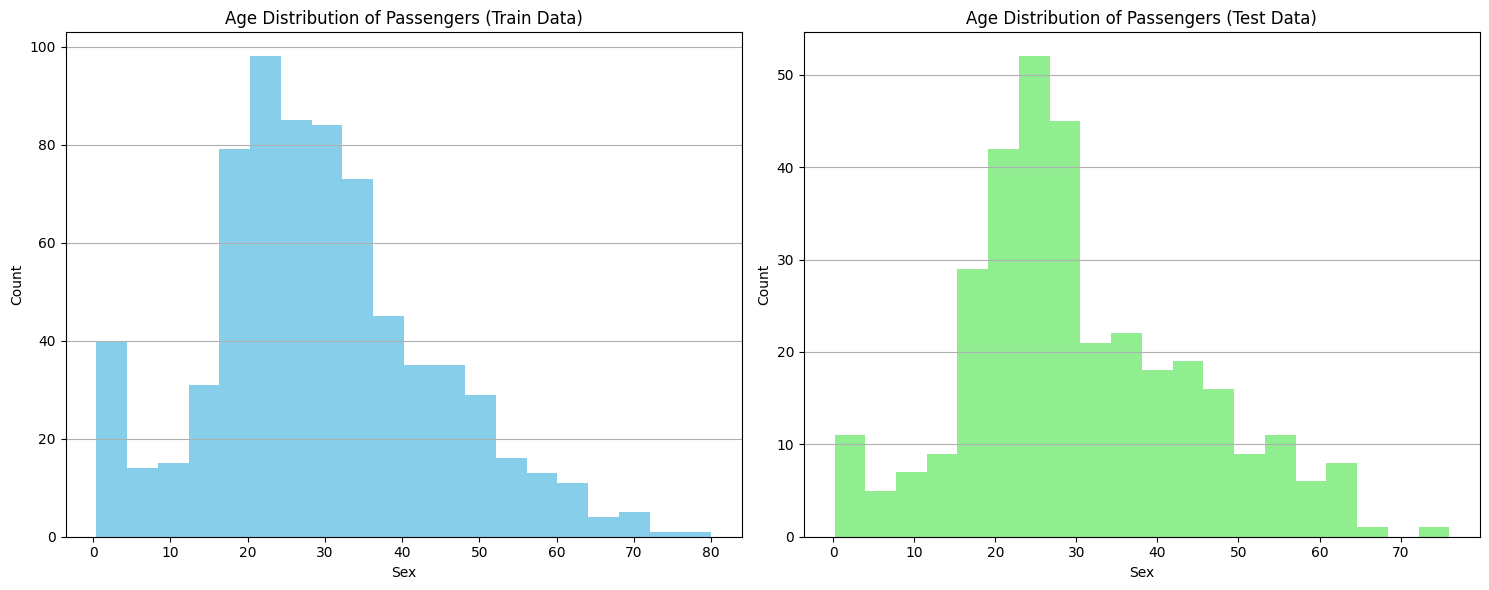

Train set NaN count: 177
Test set NaN count: 86


In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
df_train['Age'].plot(kind='hist', ax=axes[0], bins=20, color='skyblue')
axes[0].set_title("Age Distribution of Passengers (Train Data)")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y')

# Plot for df_test
df_test['Age'].plot(kind='hist', ax=axes[1], bins=20, color='lightgreen')
axes[1].set_title("Age Distribution of Passengers (Test Data)")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

nan_train = df_train['Age'].isna().sum()
nan_test = df_test['Age'].isna().sum()
print(f"Train set NaN count: {nan_train}")
print(f"Test set NaN count: {nan_test}")

It looks as if most people are in between 18 to 40 years old. This is a pretty good distribution. However, based on the NaN statistics, we will need to clean the data later.

Unique Sibling / Spouse relationships:  7
Unique Sibling / Spouse relationships in test:  7


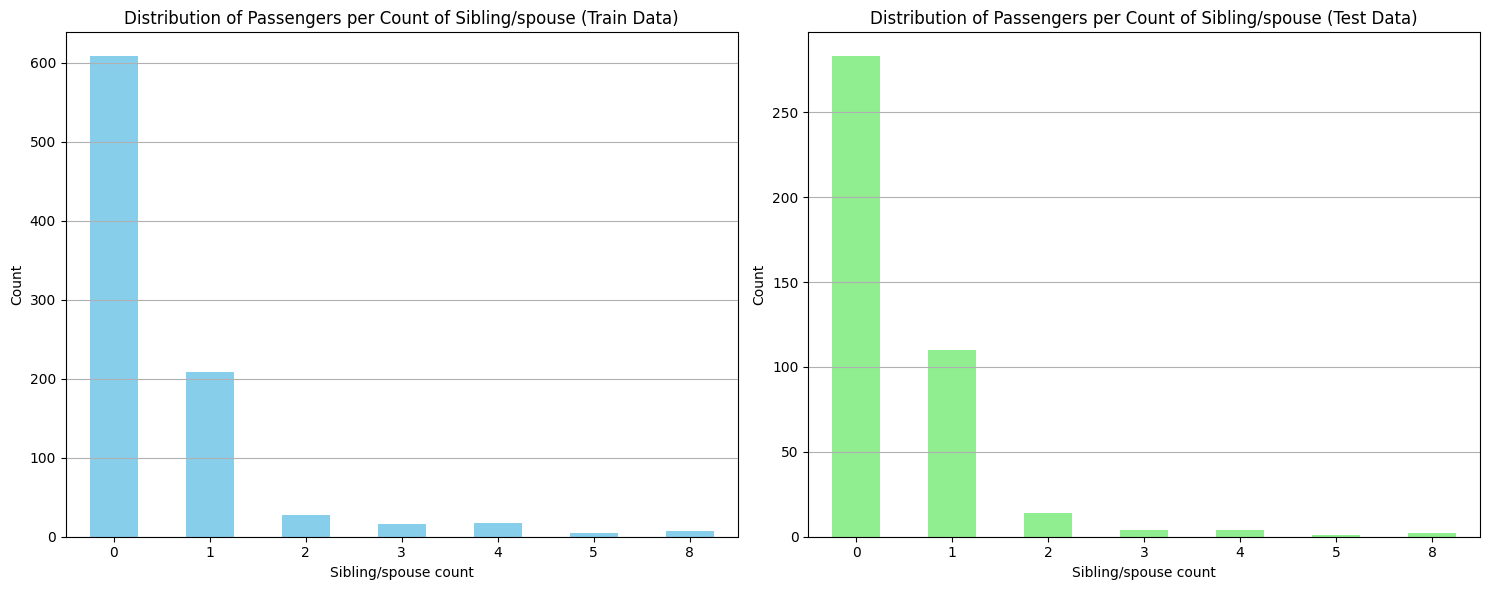

Train set NaN count: 0
Test set NaN count: 0


In [8]:
import matplotlib.pyplot as plt

print("Unique Sibling / Spouse relationships: ", df_train['SibSp'].nunique())
print("Unique Sibling / Spouse relationships in test: ", df_test['SibSp'].nunique())

sibsp_counts_train = df_train['SibSp'].value_counts().sort_index()
sibsp_counts_test = df_test['SibSp'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
sibsp_counts_train.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Passengers per Count of Sibling/spouse (Train Data)")
axes[0].set_xlabel("Sibling/spouse count")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(sibsp_counts_train)))
axes[0].set_xticklabels(sibsp_counts_train.index, rotation=0)
axes[0].grid(axis='y')

# Plot for df_test
sibsp_counts_test.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Distribution of Passengers per Count of Sibling/spouse (Test Data)")
axes[1].set_xlabel("Sibling/spouse count")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(sibsp_counts_test)))
axes[1].set_xticklabels(sibsp_counts_test.index, rotation=0)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

nan_train = df_train['SibSp'].isna().sum()
nan_test = df_test['SibSp'].isna().sum()
print(f"Train set NaN count: {nan_train}")
print(f"Test set NaN count: {nan_test}")

It looks as if most of the people do not have a sibling or spouse present on board. Based on this, the feature might not be so relevant to survival as most people have 0.

Unique Parent / Child relationships:  7
Unique Parent / Child relationships in test:  8


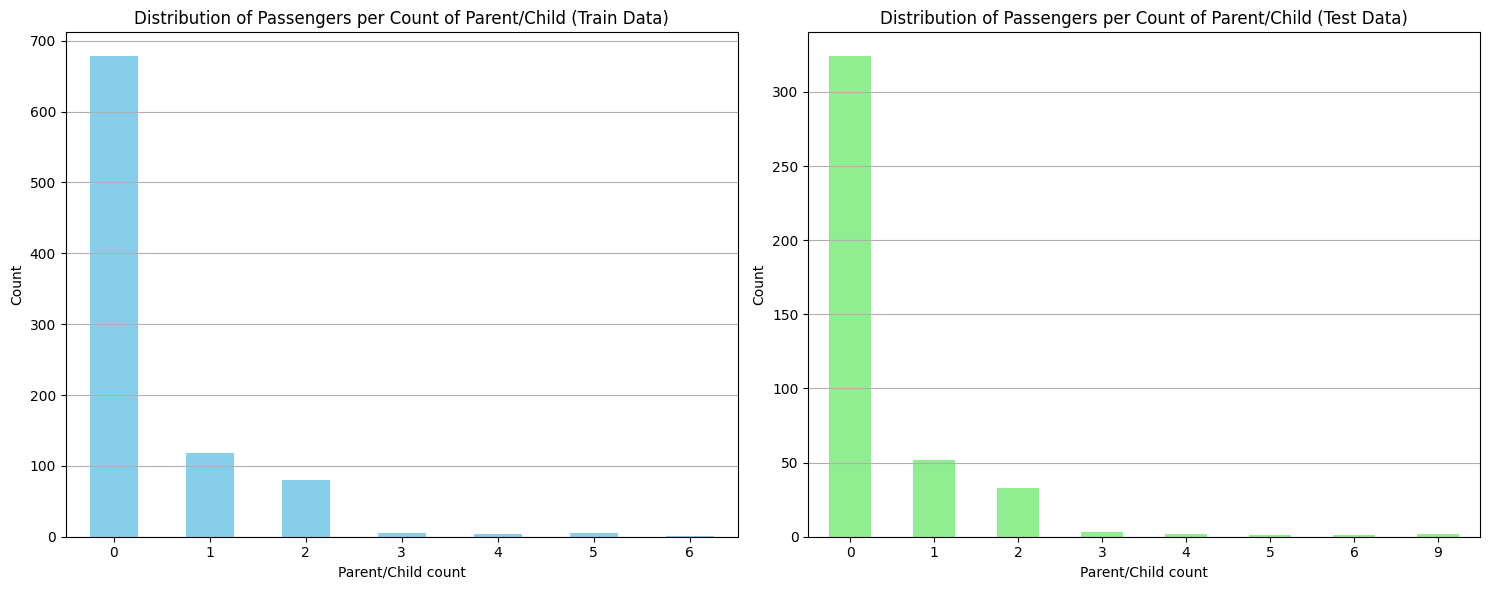

Train set NaN count: 0
Test set NaN count: 0


In [9]:
import matplotlib.pyplot as plt

print("Unique Parent / Child relationships: ", df_train['Parch'].nunique())
print("Unique Parent / Child relationships in test: ", df_test['Parch'].nunique())

parch_counts_train = df_train['Parch'].value_counts().sort_index()
parch_counts_test = df_test['Parch'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
parch_counts_train.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Passengers per Count of Parent/Child (Train Data)")
axes[0].set_xlabel("Parent/Child count")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(parch_counts_train)))
axes[0].set_xticklabels(parch_counts_train.index, rotation=0)
axes[0].grid(axis='y')

# Plot for df_test
parch_counts_test.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Distribution of Passengers per Count of Parent/Child (Test Data)")
axes[1].set_xlabel("Parent/Child count")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(parch_counts_test)))
axes[1].set_xticklabels(parch_counts_test.index, rotation=0)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

nan_train = df_train['Parch'].isna().sum()
nan_test = df_test['Parch'].isna().sum()
print(f"Train set NaN count: {nan_train}")
print(f"Test set NaN count: {nan_test}")

Again, it looks as if most people did not have a parent or child relationship on board. Again, similar to the last distribution, it may not be so relevant to survival as most people have 0.

Unique Port Embarked:  3
Unique Port Embarked in test:  3


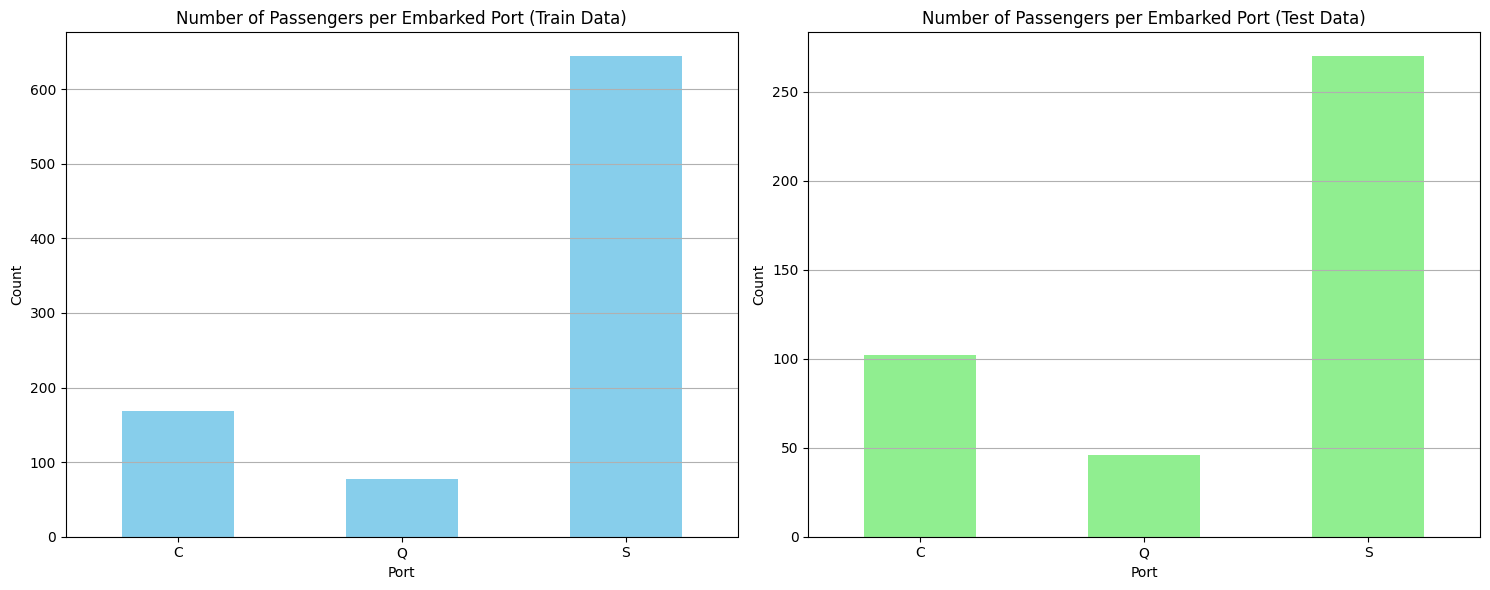

In [10]:
import matplotlib.pyplot as plt

print("Unique Port Embarked: ", df_train['Embarked'].nunique())
print("Unique Port Embarked in test: ", df_test['Embarked'].nunique())

emb_counts_train = df_train['Embarked'].value_counts().sort_index()
emb_counts_test = df_test['Embarked'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for df_train
emb_counts_train.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Number of Passengers per Embarked Port (Train Data)")
axes[0].set_xlabel("Port")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(emb_counts_train)))
axes[0].set_xticklabels(emb_counts_train.index, rotation=0)
axes[0].grid(axis='y')

# Plot for df_test
emb_counts_test.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Number of Passengers per Embarked Port (Test Data)")
axes[1].set_xlabel("Port")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(emb_counts_test)))
axes[1].set_xticklabels(emb_counts_test.index, rotation=0)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

Ok, looks as if most embarked from the port S (Southampton). I'm not sure if this will be relevant to the survival rate.

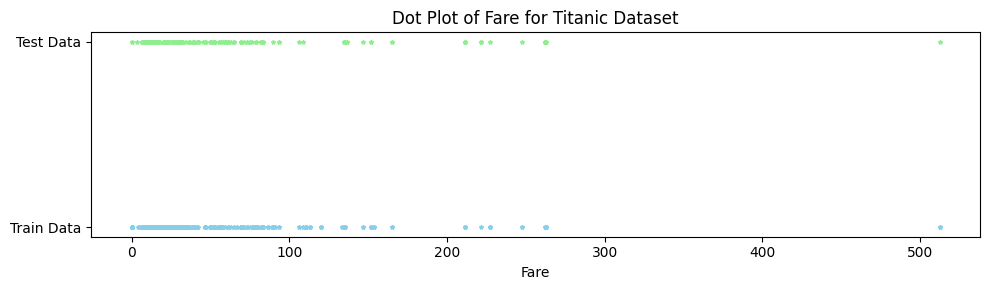

Train set NaN count: 0
Test set NaN count: 1


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

# Create the dot plot for df_train Fare column
plt.plot(df_train['Fare'], [1] * len(df_train['Fare']), '*', color='skyblue', markersize=3)

# Create the dot plot for df_test Fare column
plt.plot(df_test['Fare'], [2] * len(df_test['Fare']), '*', color='lightgreen', markersize=3)

plt.title("Dot Plot of Fare for Titanic Dataset")
plt.xlabel("Fare")
plt.yticks([1, 2], ['Train Data', 'Test Data'])
plt.tight_layout()

# Show the plot
plt.show()

nan_train = df_train['Fare'].isna().sum()
nan_test = df_test['Fare'].isna().sum()
print(f"Train set NaN count: {nan_train}")
print(f"Test set NaN count: {nan_test}")

The data looks pretty similar. But it seems as if the test data has a missing Fare whereas the train data does not. So we'll need to preprocess this.

Now, let's understand the data we've been given. Let's explore and check how many features we have and how the data looks.

But now we want to understand—are all the features important? Let's create a heatmap to help us determine the correlation between features. 

**Before that, we need to clean the data.**

* I will remove PassengerId, as that's not really relevant.
* Name is not something that will be relevant to whether someone survives.
* The ticket does not contain relevant data; it comprises letters and numbers.
* And Cabin is too hard to encode into something relevant.

We'll transform any missing age details into the median for age using a Simple Imputer.

Next, we need to preprocess the data to make it easier for the machine learning algorithms to understand. We'll convert "sex" into labels and "embarked" into labels.

In [12]:
df_train_clean = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

We use an imputer here to fill the NaNs with median.

In [13]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['Age', 'Fare']

imputer = SimpleImputer(strategy='median')
df_train_clean[columns_to_impute] = imputer.fit_transform(df_train_clean[columns_to_impute])

In [14]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df_train_clean['Sex'] = le_sex.fit_transform(df_train_clean['Sex'])
df_train_clean['Embarked'] = le_embarked.fit_transform(df_train_clean['Embarked'])

df_train_clean.shape

(891, 8)

Let's apply the same transformations to the test data.

In [15]:
df_test_clean = df_test.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket'])
df_test_clean['Sex'] = le_sex.transform(df_test_clean['Sex'])
df_test_clean['Embarked'] = le_embarked.transform(df_test_clean['Embarked'])
df_test_clean[columns_to_impute] = imputer.transform(df_test_clean[columns_to_impute])

In [16]:
df_train_clean.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


From here, we can see that Sex is the highest correlated with survival, followed by Pclass. Fare and Pclass are also highly correlated, but not really high enough to say they are collinear.

As predicted, SibSp and Parch aren't relevant to survival (-0.035 and 0.082). Interestingly, age isn't that relevant at -0.065, whereas the embarked port is more relevant at -0.164.

Following the correlation matrix, let's create a heatmap of the correlation data.

<Axes: >

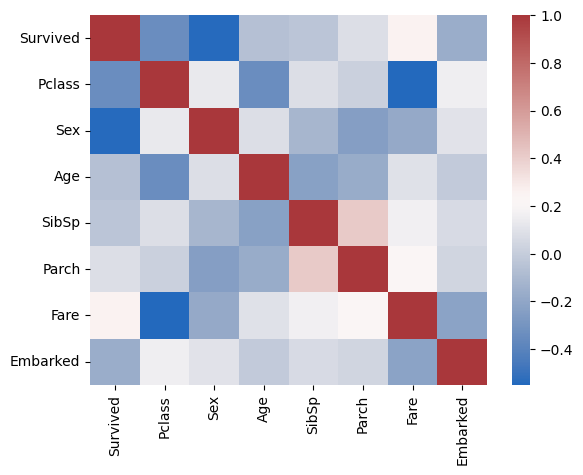

In [17]:
import seaborn as sns

sns.heatmap(data=df_train_clean.corr(), cmap="vlag")

Now, one last visualization for how the data is correlated - the pairplot with kde on the diagonal.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

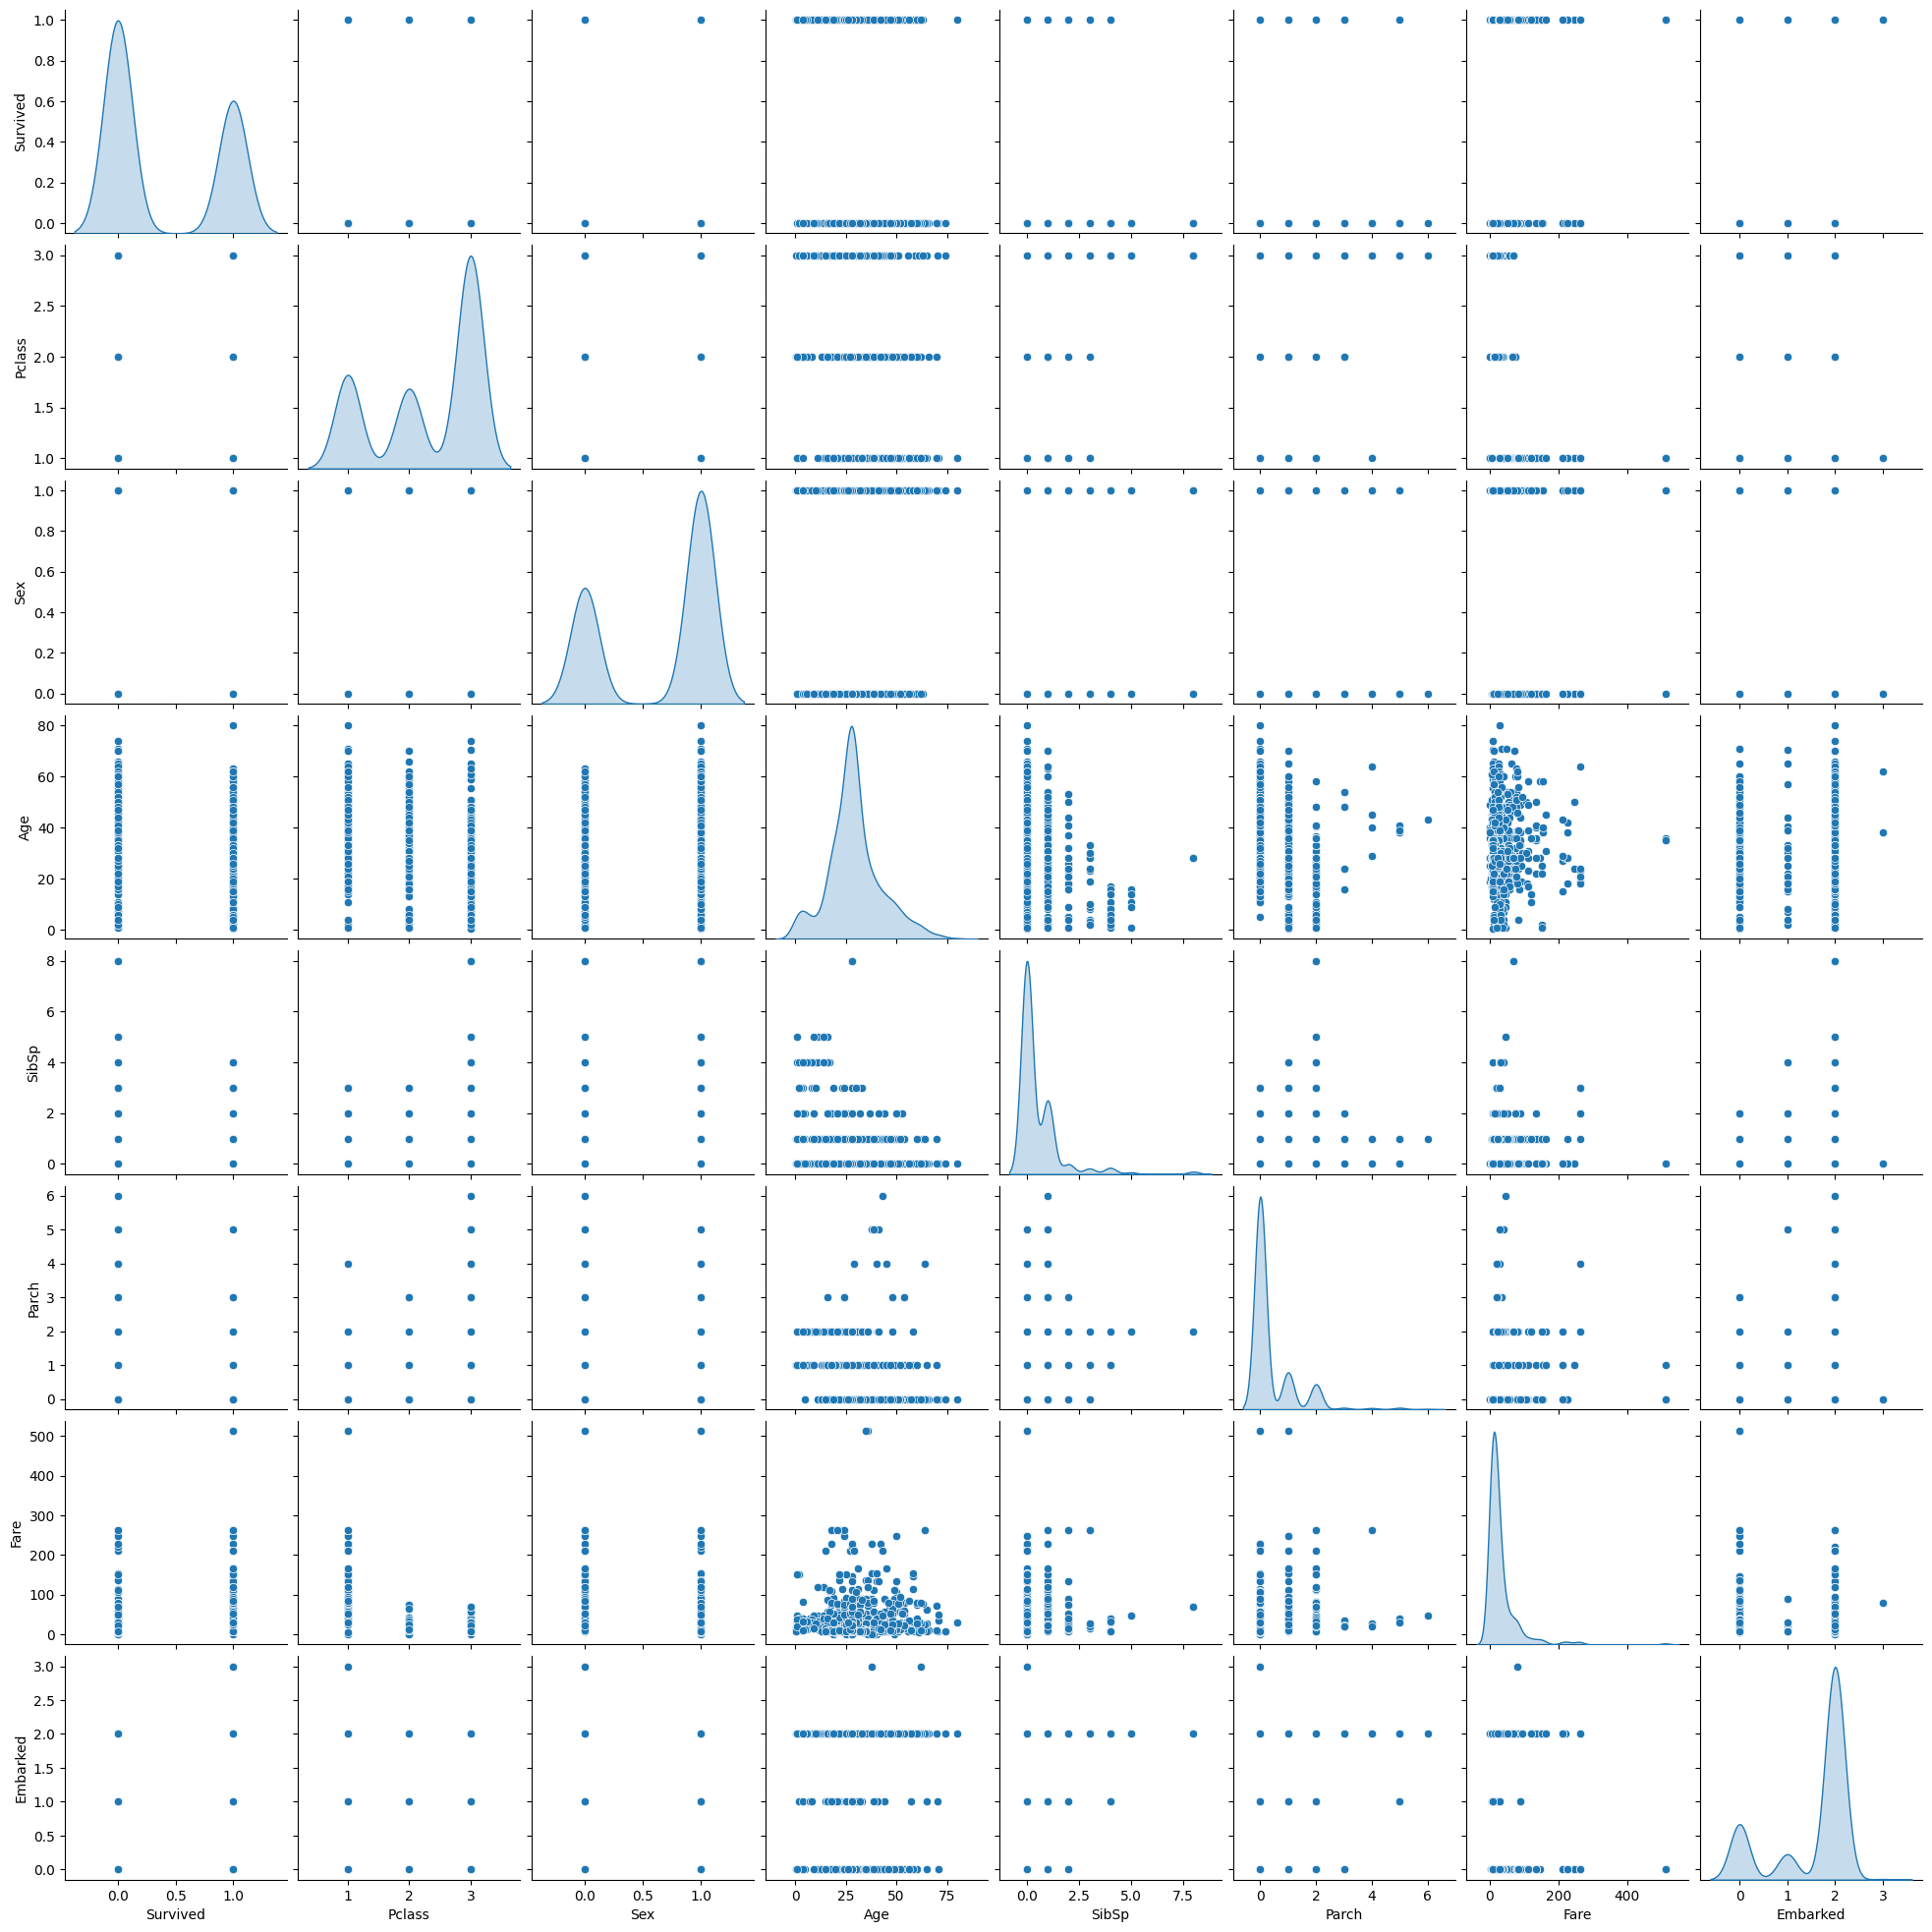

In [18]:
import seaborn as sns

sns.pairplot(df_train_clean, vars=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], diag_kind='kde')

With the diagonal distributions, we can see how the data is distributed like our bar charts above. What's interesting about the data is that it does look like Fare has some outliers. Age and SibSp look to have a small relationship based on the shape of the data. PClass and Fare also have a relationship based on the shape of the data (as should be expected).

Let's look into some survival rates as relationships to the features.

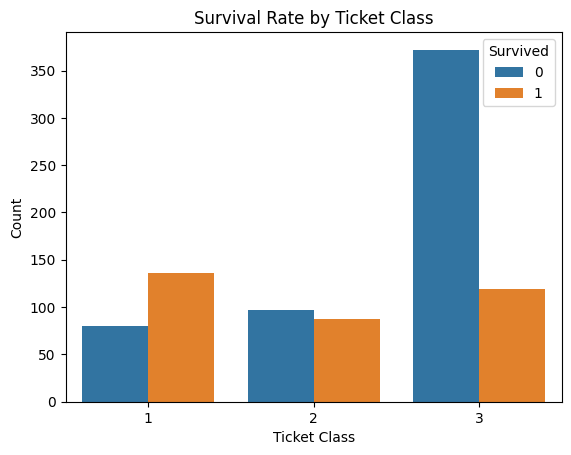

In [19]:
import seaborn as sns

sns.countplot(data=df_train_clean, x='Pclass', hue='Survived')
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

From this, we can see a correlation that PClass 3 was least likely to survive.

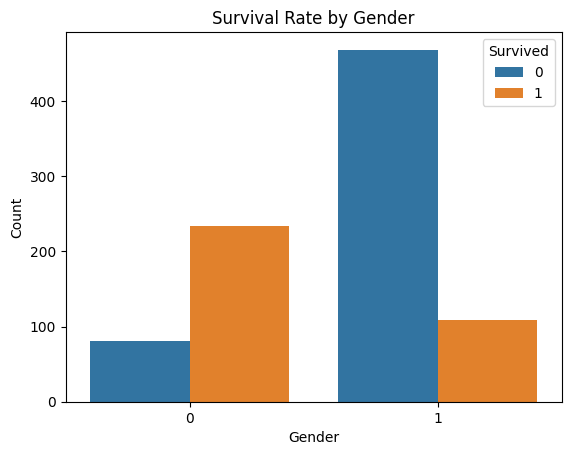

In [20]:
import seaborn as sns

sns.countplot(data=df_train_clean, x='Sex', hue='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

It looks as if males were least likely to survive. 

Now let's split our train data into train and validation datasets. This will allow us to validate our training and do some parameter tuning before submitting to the actual test prediction dataset. I've set a random state so that when I run this multiple times I can get the same result.

In [21]:
from sklearn.model_selection import train_test_split

X_all = df_train_clean.drop(columns=['Survived'])
y_all = df_train_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state=56)

# Analysis (Model Building and Training)

We are going to use multiple models here. Because this is a binary classification task (survived or dead), we cannot use simple linear regression or multiple linear regression. Also, looking at the pair plot above, there does not seem to be much colinearity, which means that Logistic Regression should be a good choice here. The first model we will use is LogisticRegression (a classifier).

In [22]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(solver = 'liblinear')
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)

The next model we are going to use AdaBoost. This gradient boosting model should work nicely with the dataset as there aren't many outliers and the data isn't too noisy after being cleaned.

In [23]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

The third model we will use is SVM (SVC). This model was chosen as it should be able to create non-linear boundaries around the data.

In [24]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)

# Results

For the LogisticRegression, let's get the confusion matrix. Let's get accuracy, precision, recall, and f1 (good for binary classification). As well, let's calculate the area under the curve.

Accuracy: 0.8380
Precision: 0.7833
Recall: 0.7460
F1: 0.7642


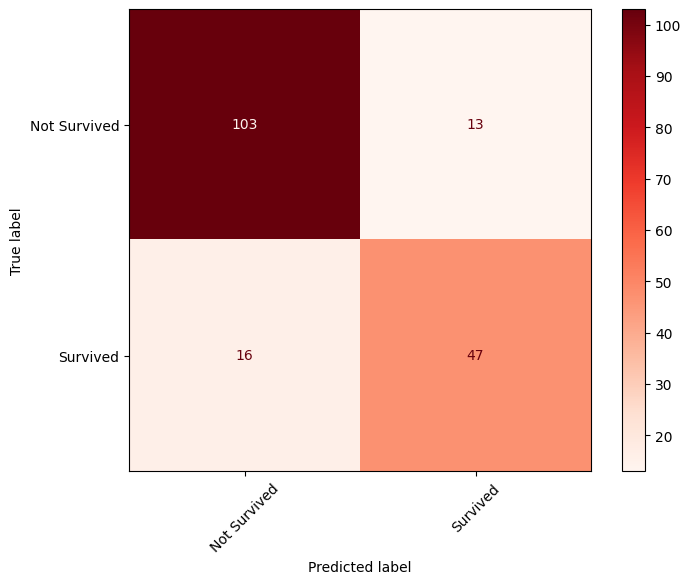

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

cm_log = confusion_matrix(y_test, y_pred_log)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f'Accuracy: {accuracy_log:.4f}')
print(f'Precision: {precision_log:.4f}')
print(f'Recall: {recall_log:.4f}')
print(f'F1: {f1_log:.4f}')

label_set = {0: 'Not Survived', 1: 'Survived'}

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[label_set[0], label_set[1]])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation=45, cmap="Reds", ax=ax)
plt.show()

Now, we can see the most misclassfied data was the false negative. That is, those who actually survived but the model classified them as not survived. The false positive rate is pretty low and that's why recall is lower than precision. F1 offers a balanced approach between recall and precision.

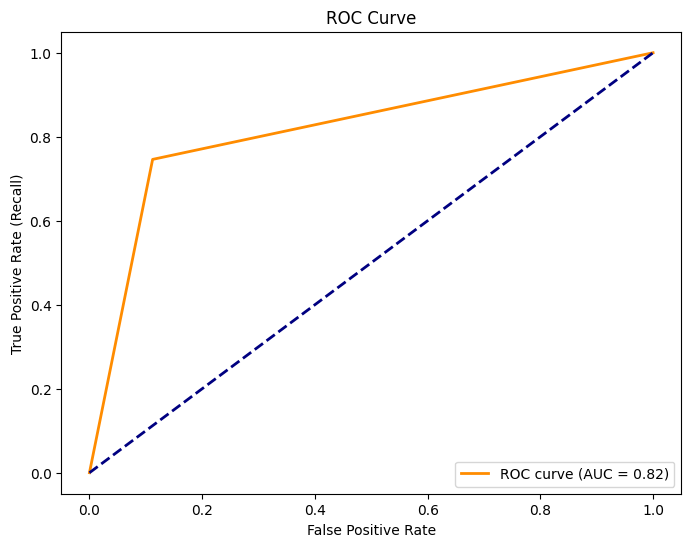

In [26]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Overall the ROC curve is above the middle line which is a good sign. The Area Under the Curve is also quite high. This highlights that Logistic Regression could be a good model and we can probably tune it a little bit.

Now let's check the results for AdaBoost

Accuracy: 0.8268
Precision: 0.7286
Recall: 0.8095
F1: 0.7669


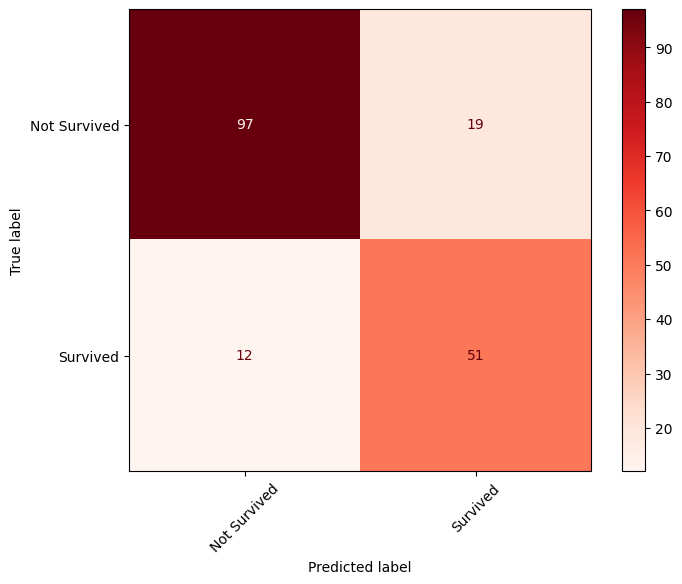

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

cm_ada = confusion_matrix(y_test, y_pred_ada)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f'Accuracy: {accuracy_ada:.4f}')
print(f'Precision: {precision_ada:.4f}')
print(f'Recall: {recall_ada:.4f}')
print(f'F1: {f1_ada:.4f}')

label_set = {0: 'Not Survived', 1: 'Survived'}

disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=[label_set[0], label_set[1]])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation=45, cmap="Reds", ax=ax)
plt.show()

Now, we can see the most misclassfied data was still the false negative. That is, those who actually survived but the model classified them as not survived. The false positive rate is pretty low but higher than logistic regression. That's why recall is lower than precision again. F1 offers a balanced approach between recall and precision. This has done better than the Logistic Regression.

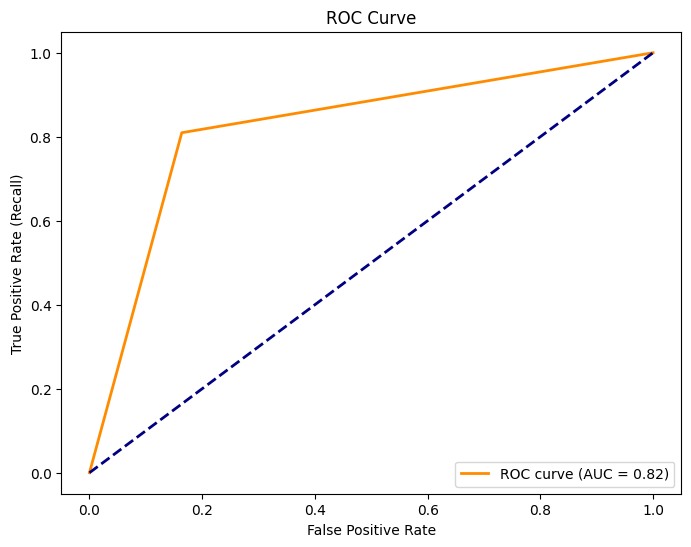

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

From here we can see the curve is a bit higher than the curve from the Logistic Regression. The Area Under the Curve is also higher.

Now let's check the results of the SVM.

Accuracy: 0.6983
Precision: 0.6452
Recall: 0.3175
F1: 0.4255
Cross-val mean-accuracy: 0.673


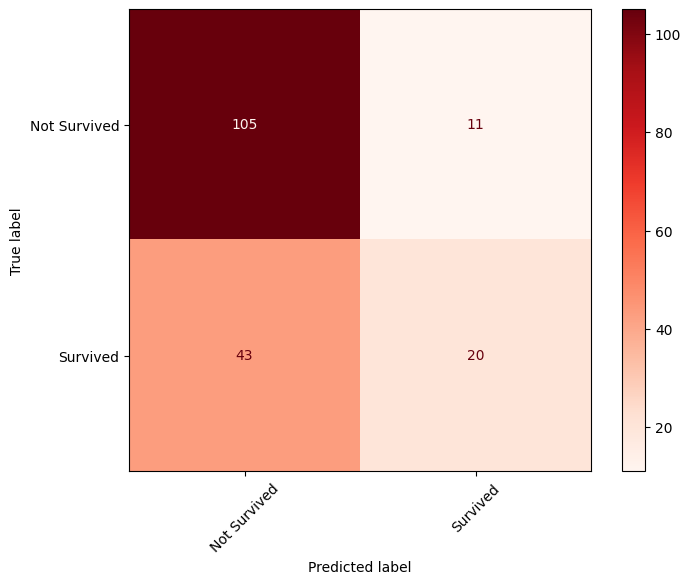

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

cm_svc = confusion_matrix(y_test, y_pred_svc)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f'Accuracy: {accuracy_svc:.4f}')
print(f'Precision: {precision_svc:.4f}')
print(f'Recall: {recall_svc:.4f}')
print(f'F1: {f1_svc:.4f}')

scores = cross_val_score(model_svc, X_train, y_train)
print("Cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))

label_set = {0: 'Not Survived', 1: 'Survived'}

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=[label_set[0], label_set[1]])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation=45, cmap="Reds", ax=ax)
plt.show()

We can see from this that the SVM had trouble with the false negatives but did better with false positives than the other two models. Overall, from the scores it doesn't seem like this would be a good model choice to continue with.

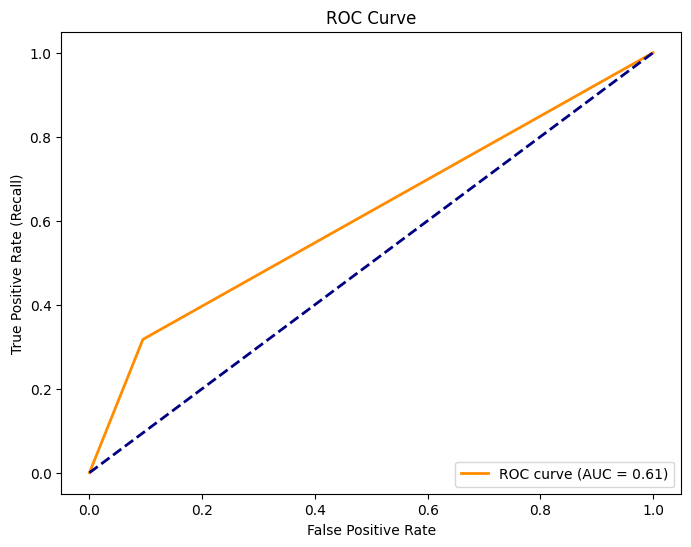

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The curve is only just above the middle line. This indicates that it probably isn't the right model for this dataset right now.

# Normalize Data

What I realized with these results, is that the SVM cannot deal with data that hasn't been normalized. In this section, I will normalize the data and re-run the models above.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_test_scaled = scaler.transform(df_test_clean)

# Run the Logistic Regression model again
model_log_scaled = LogisticRegression(solver = 'liblinear')
model_log_scaled.fit(X_train_scaled, y_train)

y_pred_log_scaled = model_log_scaled.predict(X_test_scaled)

# Run the AdaBoost model again
model_ada_scaled = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada_scaled.fit(X_train_scaled, y_train)

y_pred_ada_scaled = model_ada_scaled.predict(X_test_scaled)


# Run the SVM model again
model_svc_scaled = SVC()
model_svc_scaled.fit(X_train_scaled, y_train)

y_pred_svc_scaled = model_svc_scaled.predict(X_test_scaled)

Now let's compare the results with the data normalized.

In [32]:
# Build scores for Logistic Regression
accuracy_log_scaled = accuracy_score(y_test, y_pred_log_scaled)
precision_log_scaled = precision_score(y_test, y_pred_log_scaled)
recall_log_scaled = recall_score(y_test, y_pred_log_scaled)
f1_log_scaled = f1_score(y_test, y_pred_log_scaled)

# Build scores for AdaBoost
accuracy_ada_scaled = accuracy_score(y_test, y_pred_ada_scaled)
precision_ada_scaled = precision_score(y_test, y_pred_ada_scaled)
recall_ada_scaled = recall_score(y_test, y_pred_ada_scaled)
f1_ada_scaled = f1_score(y_test, y_pred_ada_scaled)

# Build scores for SVM
accuracy_svc_scaled = accuracy_score(y_test, y_pred_svc_scaled)
precision_svc_scaled = precision_score(y_test, y_pred_svc_scaled)
recall_svc_scaled = recall_score(y_test, y_pred_svc_scaled)
f1_svc_scaled = f1_score(y_test, y_pred_svc_scaled)

compare_scaled = {
    'Model': ['Logistic Regression', 'AdaBoost', 'SVC', 'Logistic Regression Normalized', 'AdaBoost Normalized', 'SVC Normalized'],
    'Accuracy': [accuracy_log, accuracy_ada, accuracy_svc, accuracy_log_scaled, accuracy_ada_scaled, accuracy_svc_scaled],
    'F1 Score': [f1_log, f1_ada, f1_svc, f1_log_scaled, f1_ada_scaled, f1_svc_scaled],
    'Recall': [recall_log, recall_ada, recall_svc, recall_log_scaled, recall_ada_scaled, recall_svc_scaled],
    'Precision': [precision_log, precision_ada, precision_svc, precision_log_scaled, precision_ada_scaled, precision_svc_scaled]
}
# Convert the dictionary into a DataFrame
df_compare = pd.DataFrame(compare_scaled).sort_values(by=['Accuracy', 'F1 Score'], ascending=False)
df_compare

,Model,Accuracy,F1 Score,Recall,Precision
5,SVC Normalized,0.860335,0.774775,0.682540,0.895833
0,Logistic Regression,0.837989,0.764228,0.746032,0.783333
3,Logistic Regression Normalized,0.832402,0.765625,0.777778,0.753846
1,AdaBoost,0.826816,0.766917,0.809524,0.728571
4,AdaBoost Normalized,0.826816,0.766917,0.809524,0.728571
2,SVC,0.698324,0.425532,0.317460,0.645161


What's interesting here is how much SVM has improved compared to the non-normalized version. Whereas the normalized versions of AdaBoost and Logistic Regression have both performed worse.

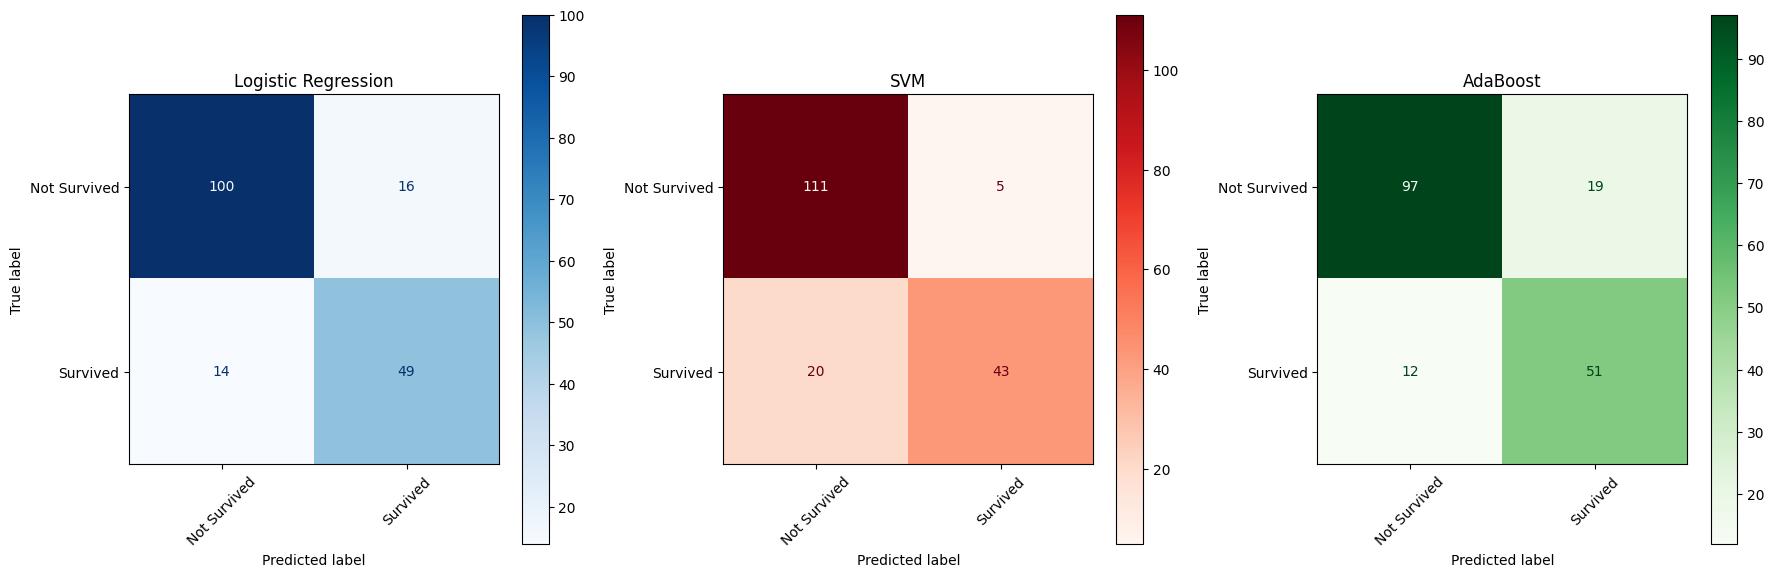

In [33]:
# Calculate the confusion matrices
cm_log_scaled = confusion_matrix(y_test, y_pred_log_scaled)
cm_svc_scaled = confusion_matrix(y_test, y_pred_svc_scaled)
cm_ada_scaled = confusion_matrix(y_test, y_pred_ada_scaled)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the confusion matrices

# Logistic Regression Confusion Matrix
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log_scaled, display_labels=['Not Survived', 'Survived'])
disp_log.plot(xticks_rotation=45, cmap="Blues", ax=axes[0])
axes[0].set_title('Logistic Regression')

# SVM Confusion Matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svc_scaled, display_labels=['Not Survived', 'Survived'])
disp_svm.plot(xticks_rotation=45, cmap="Reds", ax=axes[1])
axes[1].set_title('SVM')

# AdaBoost Confusion Matrix
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada_scaled, display_labels=['Not Survived', 'Survived'])
disp_ada.plot(xticks_rotation=45, cmap="Greens", ax=axes[2])
axes[2].set_title('AdaBoost')

plt.tight_layout()
plt.show()


We can see that the precision is best but recall is not as good for the SVM due to the low false positives but higher false negatives.

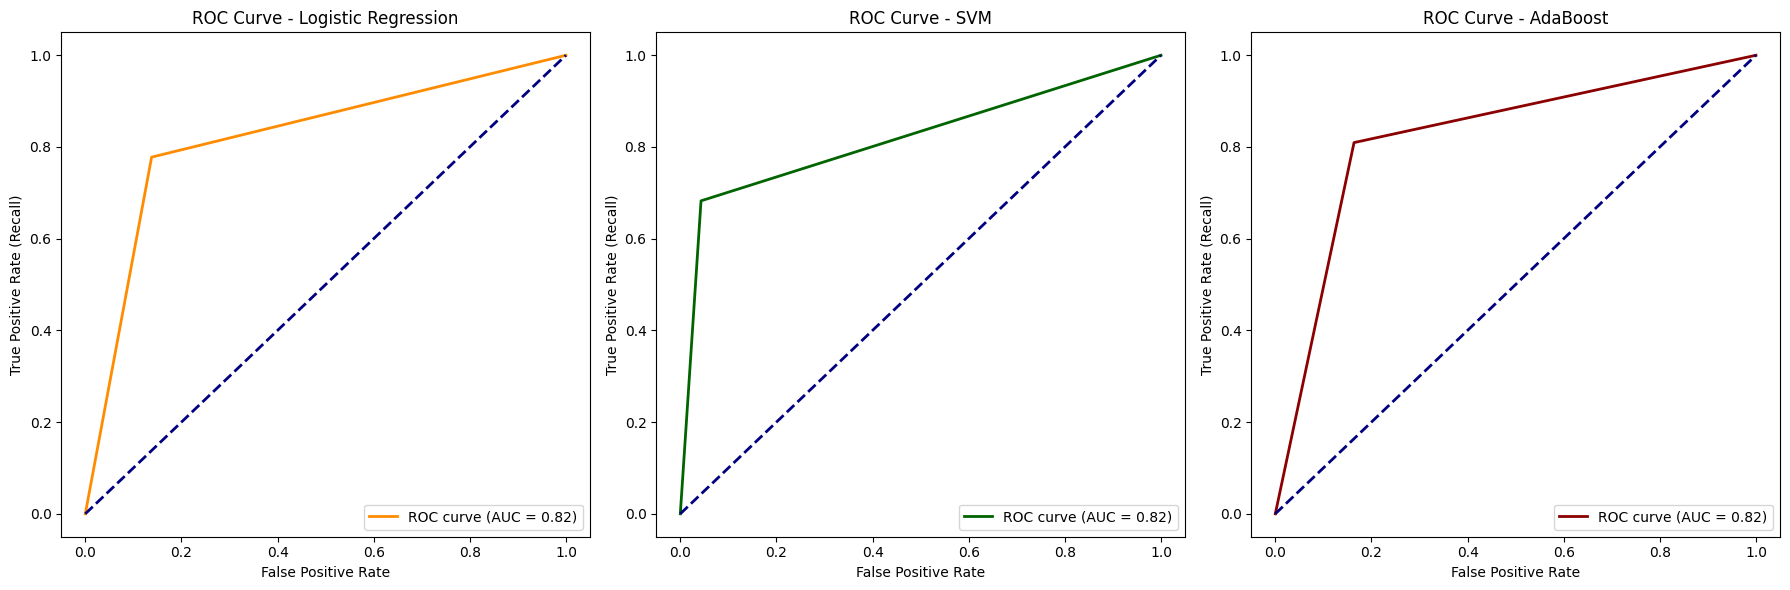

In [34]:
# Calculate the ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_scaled)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc_scaled)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada_scaled)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Set up the figure and axes for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Logistic Regression ROC curve
axes[0].plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_log:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate (Recall)')
axes[0].set_title('ROC Curve - Logistic Regression')
axes[0].legend(loc='lower right')

# Plot for SVM ROC curve
axes[1].plot(fpr_svc, tpr_svc, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('ROC Curve - SVM')
axes[1].legend(loc='lower right')

# Plot for AdaBoost ROC curve
axes[2].plot(fpr_ada, tpr_ada, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc_ada:.2f})')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate (Recall)')
axes[2].set_title('ROC Curve - AdaBoost')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

Although the other two models didn't perform as well when it came to accuracy and f1, their AUC is pretty similar and so are the ROC Curves. The SVM has had the biggest boost here.

# Tuning

From the three models (without any tuning), we can see that AdaBoost and LogisticRegression underperformed when we normalized the data. I will perform some tuning on all three models to see which has the better performance.

**AdaBoost**

The hyper parameters we will tune are the number of estimators (n_estimators) and the learning rate.

* **n_estimators:** The default is 50. This is the max number of estimators before the boosting is terminated.
* **learning_rate:** A higher learning rate increases the contribution of each classifier.

We will use f1 scoring due to being one of the best choices for comparing binary classification problems.

In [35]:
from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

param_dist = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(AdaBoostClassifier(), param_dist, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

best_ada = grid_search.best_estimator_
y_pred_best_ada = best_ada.predict(X_test_scaled)

accuracy_best_ada = accuracy_score(y_test, y_pred_best_ada)
precision_best_ada = precision_score(y_test, y_pred_best_ada)
recall_best_ada = recall_score(y_test, y_pred_best_ada)
f1_best_ada = f1_score(y_test, y_pred_best_ada)

print(f'Accuracy: {accuracy_best_ada:.4f}')
print(f'Precision: {precision_best_ada:.4f}')
print(f'Recall: {recall_best_ada:.4f}')
print(f'F1: {f1_best_ada:.4f}')

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.8547
Precision: 0.7846
Recall: 0.8095
F1: 0.7969


In [36]:
compare_ada = {
    'Model': ['Original', 'Scaled', 'Best'],
    'Accuracy': [accuracy_ada, accuracy_ada_scaled, accuracy_best_ada,],
    'F1 Score': [f1_ada, f1_ada_scaled, f1_best_ada],
    'Recall': [recall_ada, recall_ada_scaled, recall_best_ada],
    'Precision': [precision_ada, precision_ada_scaled, precision_best_ada]
}
# Convert the dictionary into a DataFrame
df_compare_ada = pd.DataFrame(compare_ada).sort_values(by=['Accuracy', 'F1 Score'], ascending=False)
df_compare_ada

,Model,Accuracy,F1 Score,Recall,Precision
2,Best,0.854749,0.796875,0.809524,0.784615
0,Original,0.826816,0.766917,0.809524,0.728571
1,Scaled,0.826816,0.766917,0.809524,0.728571


We can see from this data, that scaling and tuning creates better results for the AdaBoost.

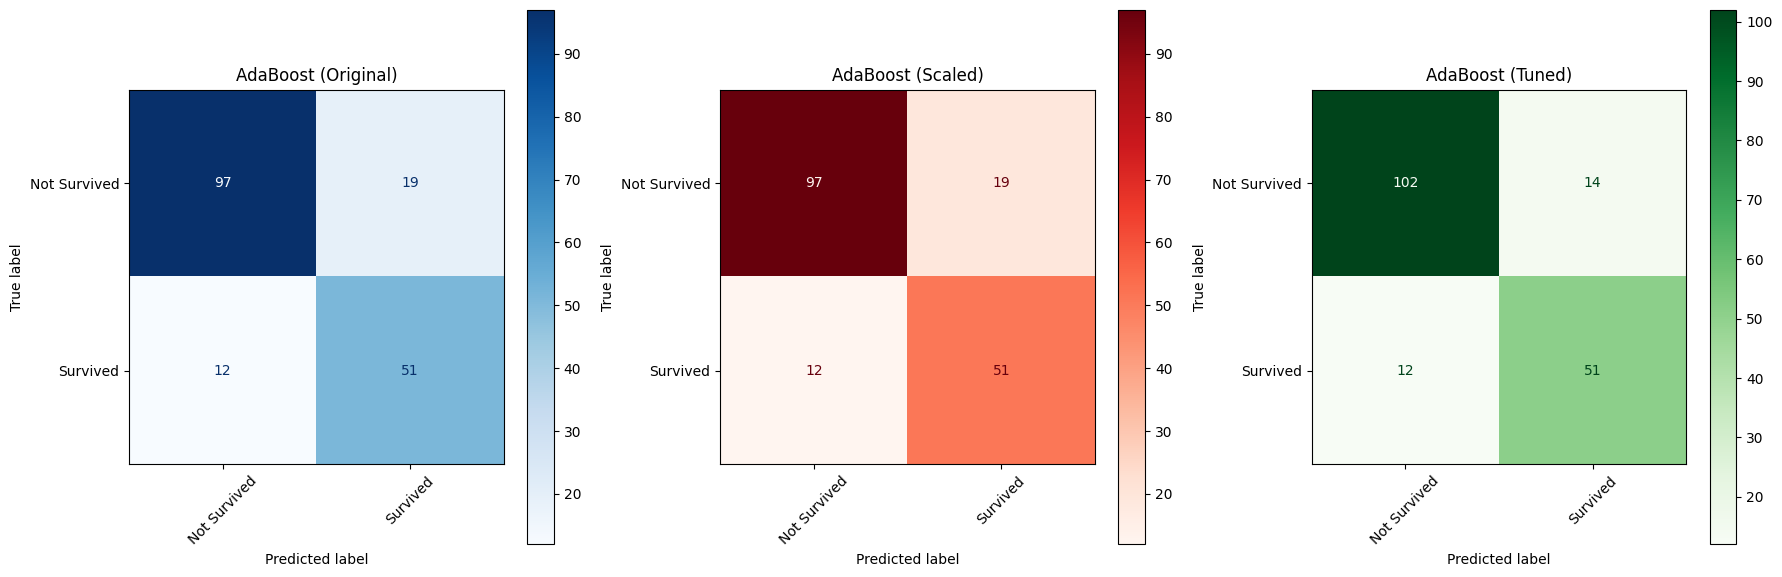

In [37]:
cm_best_ada = confusion_matrix(y_test, y_pred_best_ada)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the confusion matrices

# AdaBoost Original
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Blues", ax=axes[0])
axes[0].set_title('AdaBoost (Original)')

# AdaBoost Scaled
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_ada_scaled, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Reds", ax=axes[1])
axes[1].set_title('AdaBoost (Scaled)')

# AdaBoost Best
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best_ada, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Greens", ax=axes[2])
axes[2].set_title('AdaBoost (Tuned)')

plt.tight_layout()
plt.show()

The false positive has gone down from 19 to 14. The false negative has stayed the same. We can see that the tuning has improved precision but not recall.

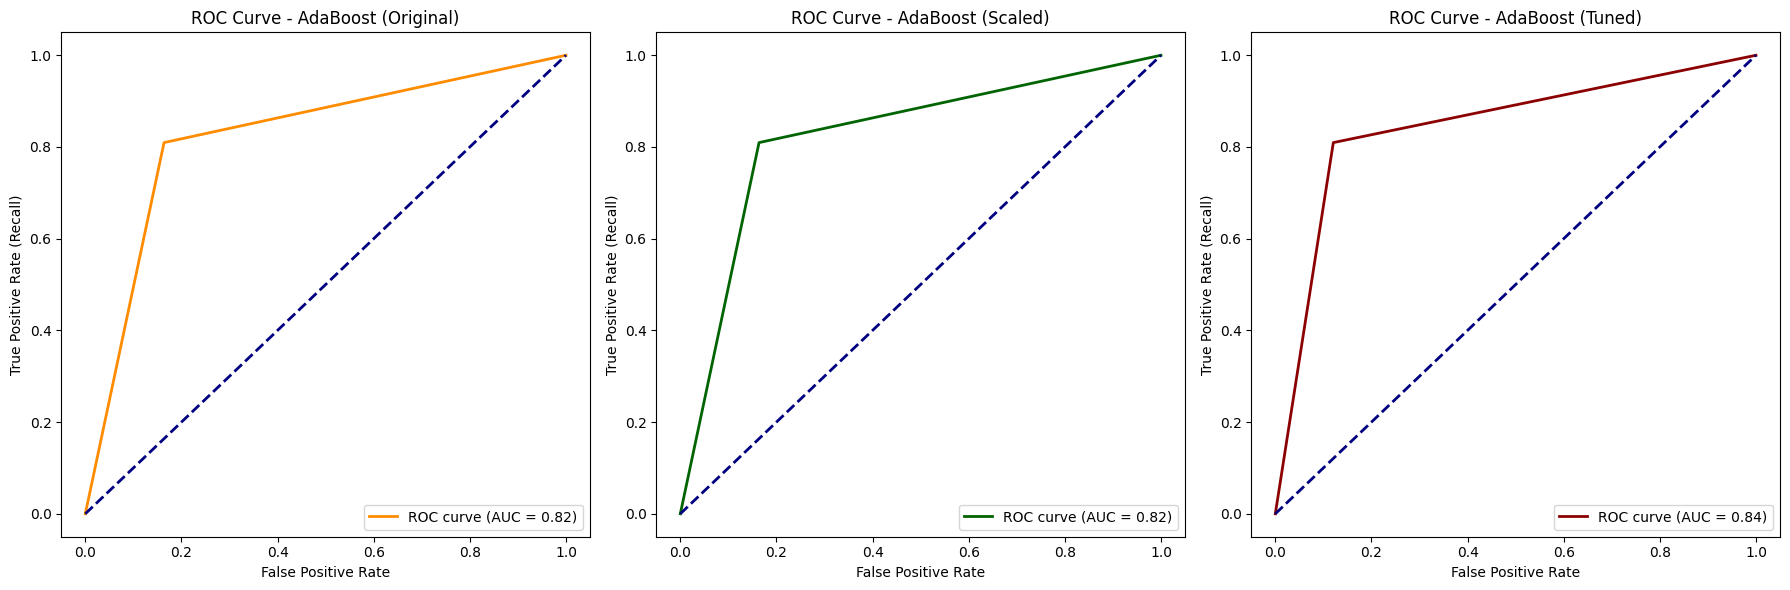

In [59]:
# Recalculate the ROC curve and AUC for each model
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred_ada)
roc_auc_org = auc(fpr_org, tpr_org)

fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_pred_ada_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_ada)
roc_auc_best = auc(fpr_best, tpr_best)

# Set up the figure and axes for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for AdaBoost orginal
axes[0].plot(fpr_org, tpr_org, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_org:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate (Recall)')
axes[0].set_title('ROC Curve - AdaBoost (Original)')
axes[0].legend(loc='lower right')

# Plot for AdaBoost scaled
axes[1].plot(fpr_scaled, tpr_scaled, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_scaled:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('ROC Curve - AdaBoost (Scaled)')
axes[1].legend(loc='lower right')

# Plot for AdaBoost Best
axes[2].plot(fpr_best, tpr_best, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate (Recall)')
axes[2].set_title('ROC Curve - AdaBoost (Tuned)')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

Looking at the ROC curve, they are all pretty similar. However, we can see that the tuned AdaBoost (the best) has the highest area under the curve.

Let's create the test predictions and get ready to submit. Note: this section is explicitly commented out as I only need it to submit to the kaggle competition. The score from the competition is on the last line.

In [39]:
#y_pred_output = best_ada.predict(df_test_scaled)

#df_predictions = pd.DataFrame({
#    'PassengerId': df_test['PassengerId'],
#    'Survived': y_pred_output
#})

#df_predictions.to_csv('submission.csv', index=False)
# Score: 0.75358

**Logistic Regression**

Next, we want to do a quick hyperparameter tuning for the LogisticRegression. The hyperparameters we will change are C, solver, and penalty. We'll also change the cap of the max iterations to 1000.

* **C:** Probably the most important parameter to change. It's the inverse of regulization (i.e. smaller values will mean more regularization). I've chosen a range of values from small to large for C to allow the GridSearchCV to compare.
* **solver:** I've chosen three solvers that work with binary classification problems (and this is a pretty small dataset). 
* **penalty:** There are two penalties - l1 and l2.

We will use f1 scoring due to being one of the best choices for comparing binary classification problems.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'newton-cholesky'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000]
}

grid_search_log = GridSearchCV(LogisticRegression(), param_grid, scoring='f1')
grid_search_log.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search_log.best_params_)

best_log = grid_search_log.best_estimator_
y_pred_best_log = best_log.predict(X_test_scaled)

accuracy_best_log = accuracy_score(y_test, y_pred_best_log)
precision_best_log = precision_score(y_test, y_pred_best_log)
recall_best_log = recall_score(y_test, y_pred_best_log)
f1_best_log = f1_score(y_test, y_pred_best_log)

print(f'Accuracy: {accuracy_best_log:.4f}')
print(f'Precision: {precision_best_log:.4f}')
print(f'Recall: {recall_best_log:.4f}')
print(f'F1: {f1_best_log:.4f}')

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8324
Precision: 0.7538
Recall: 0.7778
F1: 0.7656


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py",

What's interesting here is that there are around 30 fits with non-convergence. 

In [41]:
compare_log = {
    'Model': ['Original', 'Scaled', 'Best'],
    'Accuracy': [accuracy_log, accuracy_log_scaled, accuracy_best_log,],
    'F1 Score': [f1_log, f1_log_scaled, f1_best_log],
    'Recall': [recall_log, recall_log_scaled, recall_best_log],
    'Precision': [precision_log, precision_log_scaled, precision_best_log]
}
# Convert the dictionary into a DataFrame
df_compare_log = pd.DataFrame(compare_log).sort_values(by=['Accuracy', 'F1 Score'], ascending=False)
df_compare_log

,Model,Accuracy,F1 Score,Recall,Precision
0,Original,0.837989,0.764228,0.746032,0.783333
1,Scaled,0.832402,0.765625,0.777778,0.753846
2,Best,0.832402,0.765625,0.777778,0.753846


We can see that the scaled and the best (tuned) models are actually the same.

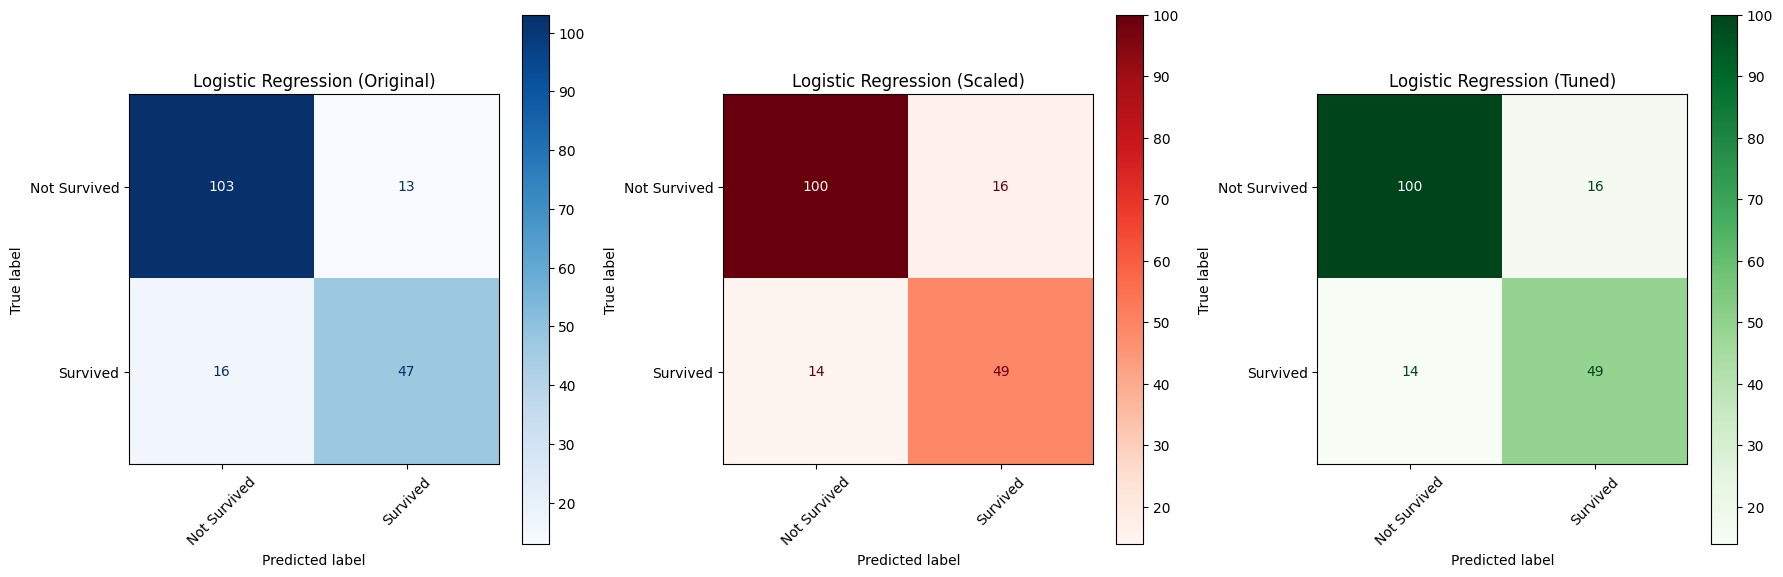

In [42]:
cm_best_log = confusion_matrix(y_test, y_pred_best_log)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the confusion matrices

# Logistic Regression Original
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Blues", ax=axes[0])
axes[0].set_title('Logistic Regression (Original)')

# Logistic Regression Scaled
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_log_scaled, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Reds", ax=axes[1])
axes[1].set_title('Logistic Regression (Scaled)')

# Logistic Regression Best
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best_log, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Greens", ax=axes[2])
axes[2].set_title('Logistic Regression (Tuned)')

plt.tight_layout()
plt.show()

We can see this by the false positives increasing from 13 to 16. The false negatives also decreased from 16 to 14. What's interesting is that the original model chosen was the best model for logistic regression.

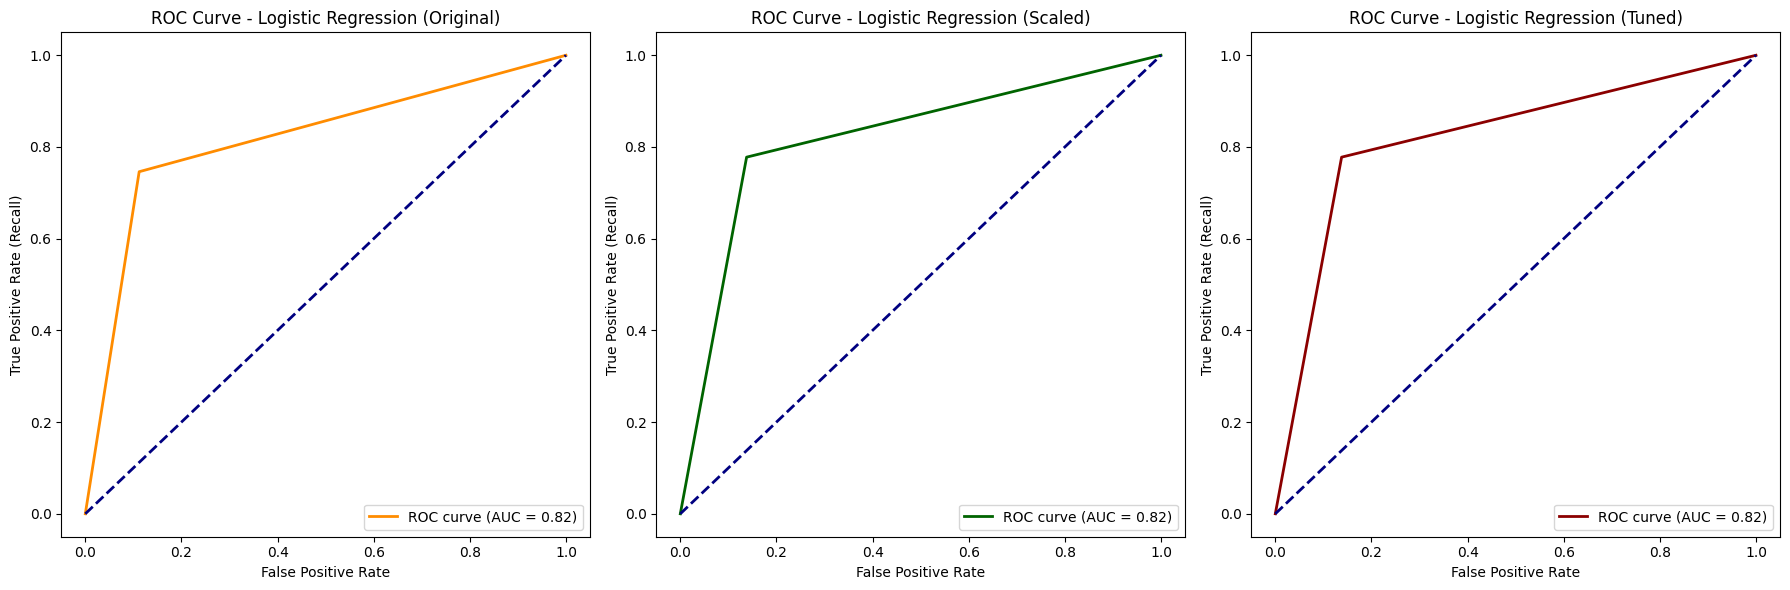

In [58]:
# Recalculate the ROC curve and AUC for each model
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred_log)
roc_auc_org = auc(fpr_org, tpr_org)

fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_pred_log_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_log)
roc_auc_best = auc(fpr_best, tpr_best)

# Set up the figure and axes for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Logistic Regression orginal
axes[0].plot(fpr_org, tpr_org, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_org:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate (Recall)')
axes[0].set_title('ROC Curve - Logistic Regression (Original)')
axes[0].legend(loc='lower right')

# Plot for Logistic Regression scaled
axes[1].plot(fpr_scaled, tpr_scaled, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_scaled:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('ROC Curve - Logistic Regression (Scaled)')
axes[1].legend(loc='lower right')

# Plot for Logistic Regression Best
axes[2].plot(fpr_best, tpr_best, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate (Recall)')
axes[2].set_title('ROC Curve - Logistic Regression (Tuned)')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

Looking at the ROC curve, it is pretty good (it's above the baseline) by a significant margin. All of the AUCs are the same which shows there's not much of a difference between the models.

Let's create the test predictions and get ready to submit. Note: this section is explicitly commented out as I only need it to submit to the kaggle competition. The score from the competition is on the last line.

In [44]:
#y_pred_output = best_log.predict(df_test_scaled)

#df_predictions = pd.DataFrame({
#    'PassengerId': df_test['PassengerId'],
#    'Survived': y_pred_output
#})

#df_predictions.to_csv('submission.csv', index=False)
# Score: 0.75119

**SVM**

The hyper parameters we will tune are C, gamma, and kernel. 

* **C:** This is the regualization. A smaller C allows more slack. A larger C has less slack.
* **gamma:** A larger gamma leads to having a more complex decision boundary.
* **kernel:** If we use the linear kernel, we'll likely have high bias but low variance. Polynomial kernels will be able to get lower bias than linear, but will have more variance. RBF kernels will have the least bias but high variance due to the intricate boundaries it can create.
* **max_iter**: I added max iterations to keep the model from infinitely running.

We will use f1 scoring due to being one of the best choices for comparing binary classification problems.

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

param_grid = {
    'C': [0.03125, 0.125, 0.5, 1, 2, 4, 16], 
    'gamma': [0.03125, 0.125, 0.5, 1, 2, 4, 16],
    'kernel': ['rbf', 'linear', 'poly'],
    'max_iter': [5000]
}

grid_search_svc = GridSearchCV(SVC(), param_grid, scoring='f1')
grid_search_svc.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search_svc.best_params_)

best_svc = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test_scaled)

accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
precision_best_svc = precision_score(y_test, y_pred_best_svc)
recall_best_svc = recall_score(y_test, y_pred_best_svc)
f1_best_svc = f1_score(y_test, y_pred_best_svc)

print(f'Accuracy: {accuracy_best_svc:.4f}')
print(f'Precision: {precision_best_svc:.4f}')
print(f'Recall: {recall_best_svc:.4f}')
print(f'F1: {f1_best_svc:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Best parameters: {'C': 1, 'gamma': 0.125, 'kernel': 'rbf', 'max_iter': 5000}
Accuracy: 0.8603
Precision: 0.8958
Recall: 0.6825
F1: 0.7748


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Here we can see many models did not reach convergence although we have used the standard scaler.

In [54]:
compare_svc = {
    'Model': ['Original', 'Scaled', 'Best'],
    'Accuracy': [accuracy_svc, accuracy_svc_scaled, accuracy_best_svc,],
    'F1 Score': [f1_svc, f1_svc_scaled, f1_best_svc],
    'Recall': [recall_svc, recall_svc_scaled, recall_best_svc],
    'Precision': [precision_svc, precision_svc_scaled, precision_best_svc]
}
# Convert the dictionary into a DataFrame
df_compare_svc = pd.DataFrame(compare_svc).sort_values(by=['Accuracy', 'F1 Score'], ascending=False)
df_compare_svc

,Model,Accuracy,F1 Score,Recall,Precision
1,Scaled,0.860335,0.774775,0.68254,0.895833
2,Best,0.860335,0.774775,0.68254,0.895833
0,Original,0.698324,0.425532,0.31746,0.645161


Here we can see that the scaled model and the tuned model have the same result.

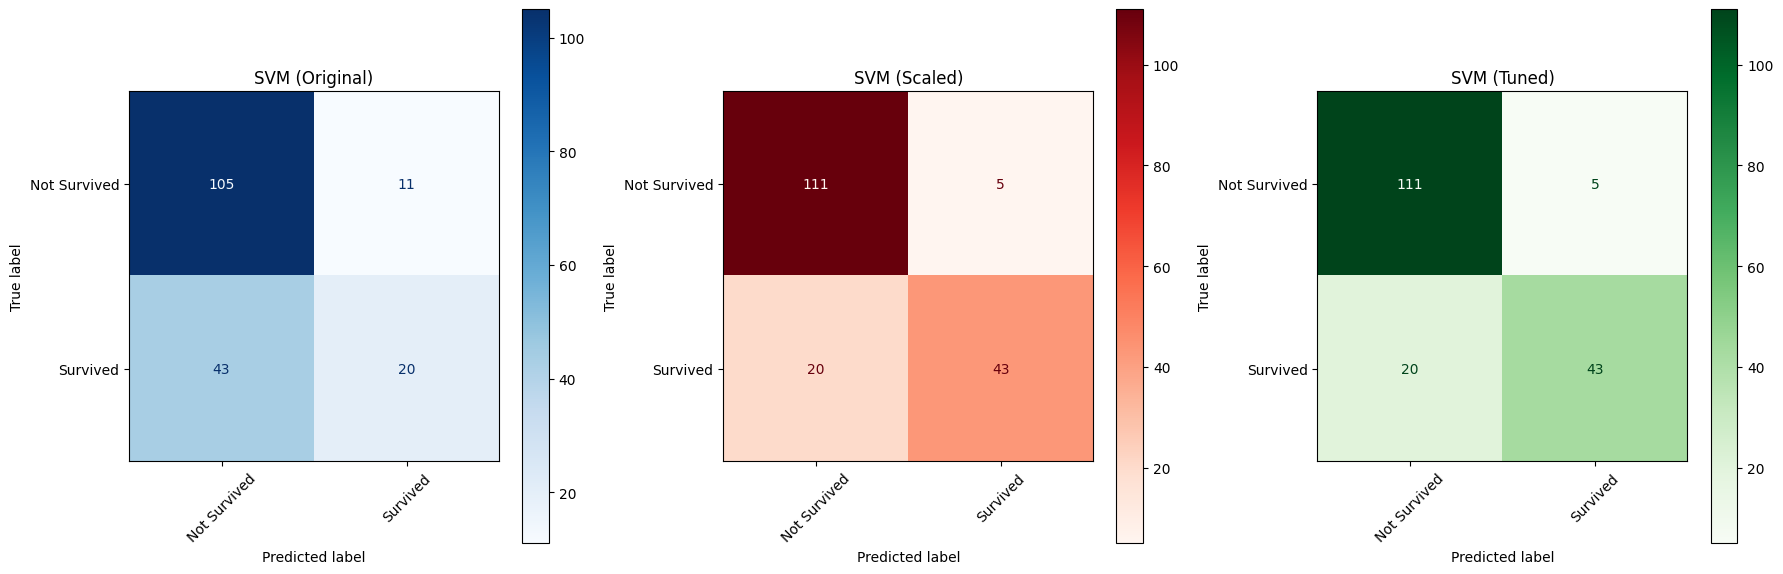

In [55]:
cm_best_svc = confusion_matrix(y_test, y_pred_best_svc)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the confusion matrices

# SVM Original
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Blues", ax=axes[0])
axes[0].set_title('SVM (Original)')

# SVM Scaled
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_svc_scaled, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Reds", ax=axes[1])
axes[1].set_title('SVM (Scaled)')

# SVM Best
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best_svc, display_labels=['Not Survived', 'Survived'])
disp_best.plot(xticks_rotation=45, cmap="Greens", ax=axes[2])
axes[2].set_title('SVM (Tuned)')

plt.tight_layout()
plt.show()

We can see this by the false positives decreasing from 11 to 5. The false negatives also decreased from 43 to 20. What's interesting is that tuning didn't provide any difference from the original model.

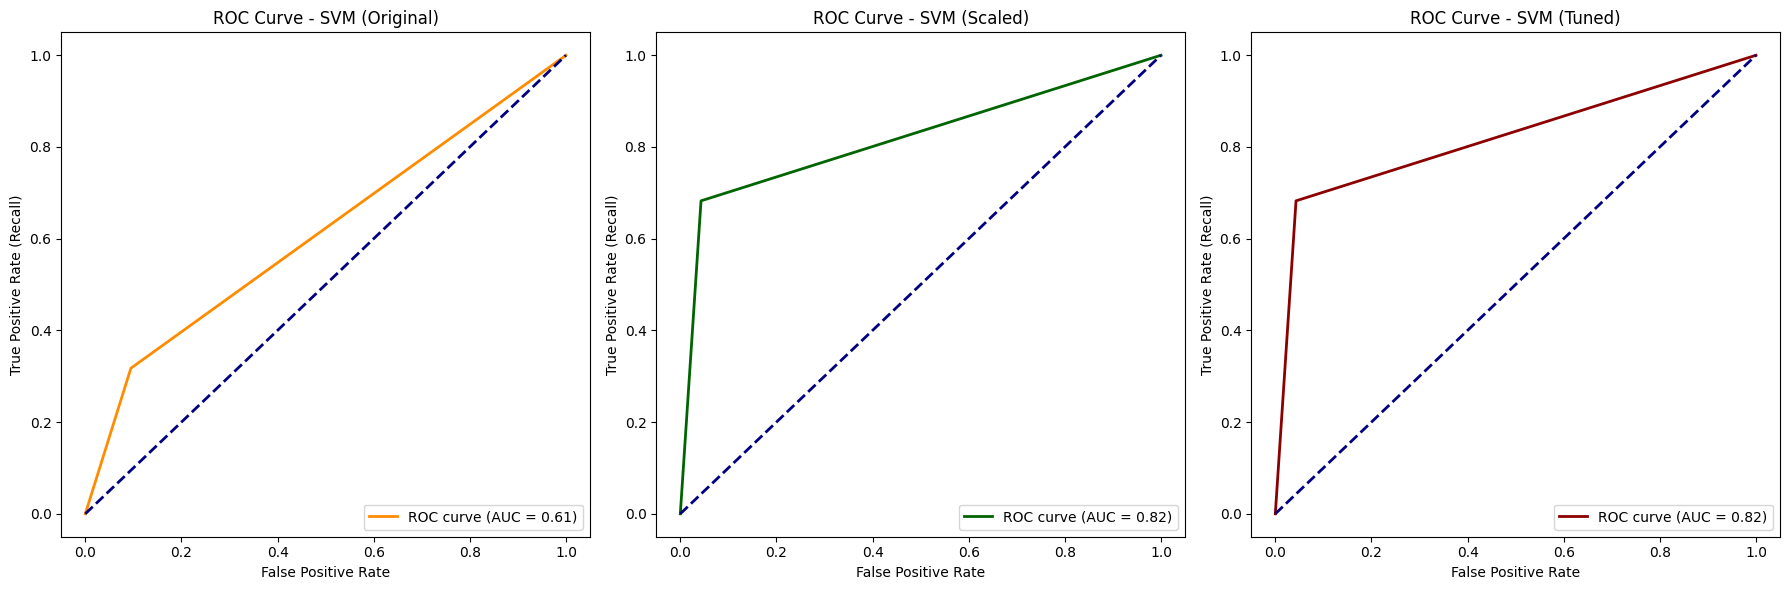

In [57]:
# Recalculate the ROC curve and AUC for each model
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred_svc)
roc_auc_org = auc(fpr_org, tpr_org)

fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_pred_svc_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_svc)
roc_auc_best = auc(fpr_best, tpr_best)

# Set up the figure and axes for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for SVM orginal
axes[0].plot(fpr_org, tpr_org, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_org:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate (Recall)')
axes[0].set_title('ROC Curve - SVM (Original)')
axes[0].legend(loc='lower right')

# Plot for SVM scaled
axes[1].plot(fpr_scaled, tpr_scaled, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_scaled:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('ROC Curve - SVM (Scaled)')
axes[1].legend(loc='lower right')

# Plot for SVM Best
axes[2].plot(fpr_best, tpr_best, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate (Recall)')
axes[2].set_title('ROC Curve - SVM (Tuned)')
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()

Looking at the ROC curve, it is pretty good (it's above the baseline) by a significant margin. We can see that scaling has a significant impact on the SVM but tuning didn't produce better results - which means that any improvement we can do from now will not be in the model but in the data.

Let's create the test predictions and get ready to submit. Note: this section is explicitly commented out as I only need it to submit to the kaggle competition. The score from the competition is on the last line.

In [49]:
#y_pred_output = best_svc.predict(df_test_scaled)

#df_predictions = pd.DataFrame({
#    'PassengerId': df_test['PassengerId'],
#    'Survived': y_pred_output
#})

#df_predictions.to_csv('submission.csv', index=False)
# Score: 0.77751

# Conclusion

In [61]:
performance_data = {
    'Model': ['LR', 'AdaBoost', 'SVM', 'Scaled LR', 'Scaled AdaBoost', 'Scaled SVM', 'Best LR', 'Best AdaBoost', 'Best SVM'],
    'Accuracy': [accuracy_log, accuracy_ada, accuracy_svc, accuracy_log_scaled, accuracy_ada_scaled, accuracy_svc_scaled, accuracy_best_log, accuracy_best_ada, accuracy_best_svc],
    'F1 Score': [f1_log, f1_ada, f1_svc, f1_log_scaled, f1_ada_scaled, f1_svc_scaled, f1_best_log, f1_best_ada, f1_best_svc],
    'Recall': [recall_log, recall_ada, recall_svc, recall_log_scaled, recall_ada_scaled, recall_svc_scaled, recall_best_log, recall_best_ada, recall_best_svc],
    'Precision': [precision_log, precision_ada, precision_svc, precision_log_scaled, precision_ada_scaled, precision_svc_scaled, precision_best_log, precision_best_ada, precision_best_svc]
}

# Convert the dictionary into a DataFrame
df_performance = pd.DataFrame(performance_data).sort_values(by=['Accuracy', 'F1 Score'], ascending=False)
df_performance

,Model,Accuracy,F1 Score,Recall,Precision
5,Scaled SVM,0.860335,0.774775,0.682540,0.895833
8,Best SVM,0.860335,0.774775,0.682540,0.895833
7,Best AdaBoost,0.854749,0.796875,0.809524,0.784615
0,LR,0.837989,0.764228,0.746032,0.783333
3,Scaled LR,0.832402,0.765625,0.777778,0.753846
6,Best LR,0.832402,0.765625,0.777778,0.753846
1,AdaBoost,0.826816,0.766917,0.809524,0.728571
4,Scaled AdaBoost,0.826816,0.766917,0.809524,0.728571
2,SVM,0.698324,0.425532,0.317460,0.645161


**Discussion**

From the table above, we can clearly see that scaling the data provided meaningful results for the SVM. AdaBoost benefited from scaling and tuning, whereas logistic regression didn't see any benefit from either scaling or hyperparameter tuning.

From the earlier submissions, we can also see that the actual test data returned an accuracy of 0.76315 for the AdaBoost and 0.76555 for the Logistic Regression. SVM performed the best, with a score of 0.77751. All three models had some overfit, as the accuracy went from 0.8x to 0.7x.

Looking back at the Area under the Curve for the Receiver Operating Characteristic curve, the AdaBoost (tuned) scored the best 0.84 compared to 0.82 for Logistic Regression and SVM.

**Improvements**

What I can see from these experiments is that SVM benefits from scaled data (i.e. it is more sensitive than the other models). Examining the features with experiments to determine whether there is colinearity or not would be good to explore. I would also see if the features I got rid of correlate with the results (i.e., name). If people share the same last name, will they survive or die together? Also, Cabin (if people share a cabin) - can this be translated into a feature? 

One last improvement is that we are optimizing for accuracy for the final test data. When tuning the models, I could have used accuracy rather than F1 score to achieve better results. That would be an area to explore next.

**Final words**

Overall, the models are satisfying. SVM performed the best after scaling the data and tuning. All models perform relatively well but still have room for improvement. Most of the improvement will come from the data rather than model tuning. Data improvement can include feature selection, different ways of filling in the missing data, and interpretation of text data.

**References:**

Will Cukierski. (2012). Titanic - Machine Learning from Disaster, 1. Retrieved 05/07/2025 from https://kaggle.com/competitions/titanic.

Alexander Michael Aitken. (2025). Week 4 - Part 1 - BBC News Classification. 21. Retrieved 05/06/2025 from https://www.kaggle.com/code/alexandermaitken/week-4-part-1-bbc-news-classification

Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.

* https://scikit-learn.org/stable/modules/model_evaluation.html#binary-classification
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html